In [1]:
import numpy as np
import scipy as scipy
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import random

Two Hypotheses:

H0: background + signal

H1: background only


In [2]:
data_samples = 1000
s0 = 1     #nominal signal events = 1

H0: sig + bkg

In [3]:
background_H0   = 100.0    #expected bkg in signal region
signal_H0   =  random.randint(0,100)   #unknown signal sig - random  
events_H0 = background_H0 + signal_H0    #total expected events
mu_H0    = signal_H0/s0   #expected POI

lam = mu_H0 * s0 + background_H0

observed_events_H0 = poisson.rvs(mu=lam, loc=0.0, size=data_samples)


H1: bkg

In [4]:
background_H1   = 100.0    #expected bkg in signal region
signal_H1   =  0.0   #unknown signal sig in signal region
events_H1 = background_H1 + signal_H1    #total expected events
mu_H1    = signal_H1/s0   #expected POI

lam_H1 = mu_H1 * s0 + background_H1

observed_events_H1 = poisson.rvs(mu=lam_H1, loc=0.0, size=data_samples)

In [5]:
def likelihood(mu, n, background):
    s0 = 1.0
    signal = mu * s0
    expected_events = signal + background
    likelihood = poisson.pmf(n, mu=expected_events)
    return likelihood

In [6]:
def log_likelihood(mu, n,background):
    s0 = 1
    signal = mu * s0
    expected_events = signal + background
    log_likelihood = poisson.logpmf(n, mu=expected_events)
    return log_likelihood

In [7]:
def log_l_free(x, n, background):
    s0 =1
    mu   = x
    log_likelihood_free = log_likelihood(mu, n, background)
    return log_likelihood_free

In [8]:
def neg_log_l_cond(n, background):
    mu   = 0
    log_likelihood_cond = log_likelihood(mu, n, background)
    return -log_likelihood_cond

In [9]:
def neg_log_l_free(x, n, background):
    mu   = x
    # background = x[1]
    log_likelihood_free = log_likelihood(mu, n, background)
    return -log_likelihood_free

In [10]:
def maximise_LL(n, background, mu):
    
    fit_result_free = minimize(neg_log_l_free, x0=[1.0], args=(n,background), method='Nelder-Mead') 
    LL_free = -fit_result_free['fun'] 
    parameter_MLE_free = fit_result_free['x']
    mu_fit_free = parameter_MLE_free[0]

    return (LL_free, mu_fit_free)

In [11]:
LL_cond_H0= -(neg_log_l_cond(observed_events_H0,background_H0))
LL_cond_H1 = -(neg_log_l_cond(observed_events_H1,background_H1)) 

In [12]:
max_LL_results_H0 = [maximise_LL(n, background_H0, mu=mu_H0) for n in observed_events_H0]
max_LL_results_H0 = np.array(max_LL_results_H0)
max_LL_results_H1 = [maximise_LL(n, background_H1, mu=mu_H0) for n in observed_events_H1]
max_LL_results_H1 = np.array(max_LL_results_H1)

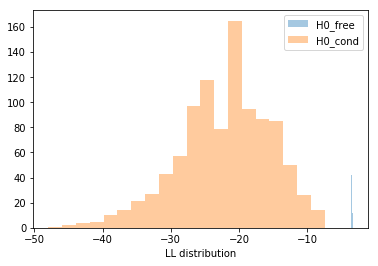

In [13]:
f,a = plt.subplots()
a.hist(max_LL_results_H0[:,0], bins=20, alpha=0.4, label = 'H0_free')
a.hist(LL_cond_H0, bins=20, alpha=0.4, label='H0_cond')
a.set_xlabel("LL distribution")
a.legend()

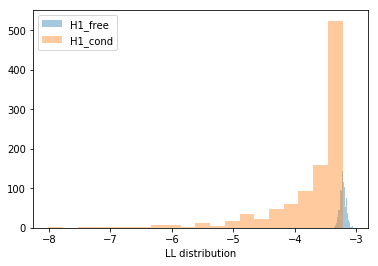

In [14]:
f,a = plt.subplots()
a.hist(max_LL_results_H1[:,0], bins=20, alpha=0.4 , label = "H1_free")
a.hist(LL_cond_H1, bins=20, alpha=0.4, label = "H1_cond")
a.set_xlabel("LL distribution")
a.legend()

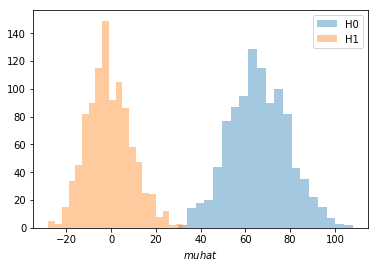

In [15]:
f,a = plt.subplots()
a.hist(max_LL_results_H0[:,1], bins=20, alpha=0.4, label = 'H0')
a.hist(max_LL_results_H1[:,1], bins=20, alpha=0.4, label = 'H1')
a.set_xlabel("$mu hat$")
a.legend()

In [16]:
LL_free_H0 = max_LL_results_H0[:,0]
LL_free_H1 = max_LL_results_H1[:,0]
t_H0 = -2.0*(LL_cond_H0 - LL_free_H0)
t_H1 = -2.0*(LL_cond_H1 - LL_free_H1) 

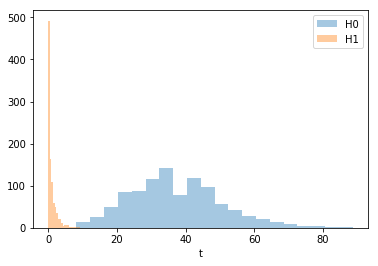

In [17]:
f,a = plt.subplots()
a.hist(t_H0, bins=20, alpha=0.4, label='H0')
a.hist(t_H1, bins=20, alpha=0.4, label='H1')
a.set_xlabel('t')
a.legend()